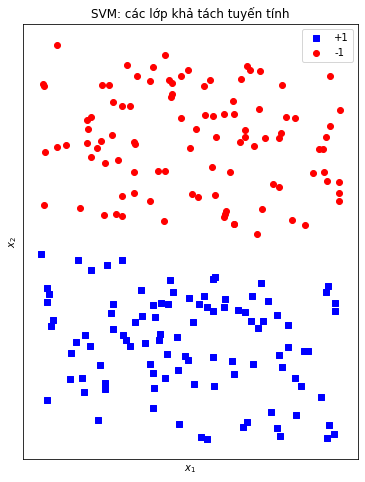

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# data size (each class)
N = 100

# generate original data
X_1_data_1 = np.random.uniform(2,3,N)
X_1_data_2 = (-X_1_data_1 + 5) - np.random.uniform(0.5,5,N)
X_2_data_1 = np.random.uniform(2,3,N)
X_2_data_2 = (-X_2_data_1 + 5) + np.random.uniform(0.5,5,N)
t_1_data = np.array([1 for i in range(N)])
t_2_data = np.array([-1 for i in range(N)])
X_data_1 = np.hstack((X_1_data_1,X_2_data_1))
X_data_2= np.hstack((X_1_data_2,X_2_data_2))

# setting the plot
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('SVM: các lớp khả tách tuyến tính')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xticks(())
ax.set_yticks(())

# plot the original data
ax.scatter(X_1_data_1, X_1_data_2, label='+1', marker='s', c='b')
ax.scatter(X_2_data_1, X_2_data_2, label='-1', c='r')
ax.legend()
plt.show()

In [3]:
# get transformed data
def getTransformedData(X, Y, N, M):
    X_data = np.empty((0,M))
    t_data = np.array([])
    for i in range(2):
        X_data = np.vstack((X_data, transformClassData(X[i], Y[i], N, M)))
    t_data = np.hstack((t_data, [1 for i in range(N)]))
    t_data = np.hstack((t_data, [-1 for i in range(N)]))
    return X_data, t_data.reshape(2*N,1)

# transform data of one class
def transformClassData(X, Y, N, M):
    res = np.empty((0,M))
    for i in range(N):
        res = np.vstack((res, getTransformedFeature(X[i], Y[i], M)))
    return res

# transform each row of data
def getTransformedFeature(x, y, M):
    res = np.array([])
    count = 0
    exp_1 = 0
    exp_2 = 0
    while(True):
        res = np.append(res, (x**exp_1)*(y**exp_2))
        count += 1
        if (count == M):
            break
        else:
            exp_1 -= 1
            if (exp_1 == -1):
                exp_1 = exp_2 + 1
                exp_2 = 0
            else:
                exp_2 += 1
    return res

# predict function
def predict(X, Y, w, b, M):
    N = len(X[0])
    Z = np.empty((0,N))
    for x,y in zip(X,Y):
        X_ = transformClassData(x, y, N, M-1)
        z = np.dot(X_,w) + b
        z[z > 0] = 1
        z[z < 0] = -1
        Z = np.vstack((Z,z.T))
    return Z

# calculating linear boundary
def getBoundaryY(X, M, w, b, line_index):
    Y = np.array([])
    if (M == 4):
        for x in X:
            y = (line_index - b - np.dot(w[:2].T, np.array([[1],[x]])))/w[2]
            Y = np.append(Y, y)
    return Y

In [4]:
# feature size
M = 4

# get transformed data
X_ = np.vstack((X_1_data_1,X_2_data_1))
Y_ = np.vstack((X_1_data_2,X_2_data_2))
(X_data, t_data) = getTransformedData(X_, Y_, N, M-1)

# Primal Problem

In [5]:
# CVXOPT variables
 # K
K = np.identity(M)
K[M-1] *= 0
K = matrix(K)
 # p
p = matrix(np.zeros((M,1)))
 # G
G = matrix(np.hstack((-t_data*X_data, -t_data)))
 # h
h = matrix(-np.ones((2*N,1)))

# solve
solvers.options['show_progress'] = False
solution = solvers.qp(K,p,G,h)

# get solution
w_b = np.array(solution['x'])
w = w_b[:M-1]
b = w_b[M-1][0]

print('w: \n', w)
print('b: \n', b)

w: 
 [[ 6.50209883e-16]
 [-1.36824413e+00]
 [-2.05287812e+00]]
b: 
 8.583900221340716


In [6]:
# plot data
x = np.arange(1.5,3.25,0.01)
y = np.arange(-3.5,8.5,0.01)
(xx, yy) = np.meshgrid(x, y)
z = predict(xx,yy,w,b,M)

# decision boundary
y_0 = getBoundaryY(x, M, w, b, 0)
y_1 = getBoundaryY(x, M, w, b, 1)
y_2 = getBoundaryY(x, M, w, b, -1)

# get points on margin
x_margin_1 = np.array([])
y_margin_1 = np.array([])
x_margin_2 = np.array([])
y_margin_2 = np.array([])
for x_,y_ in zip(X_data_1, X_data_2):
    z_ = np.dot(w.T,np.array([[1],[x_],[y_]]))+b
    if (round(z_[0][0],2) == 1):
        x_margin_1 = np.append(x_margin_1, x_)
        y_margin_1 = np.append(y_margin_1, y_)
    elif (round(z_[0][0],2) == -1):
        x_margin_2 = np.append(x_margin_2, x_)
        y_margin_2 = np.append(y_margin_2, y_)
        
# get angle
angle = np.rad2deg(np.arctan2(y_0[15]-y_0[5], x[15]-x[5]))

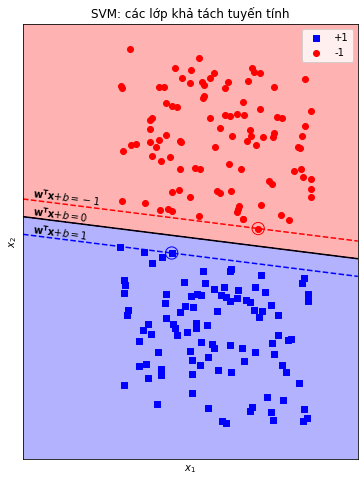

In [7]:
# setting the plot
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('SVM: các lớp khả tách tuyến tính')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xticks(())
ax.set_yticks(())

# plot the original data
ax.contourf(x,y,z,colors=['r','b'], alpha=0.3)
ax.scatter(X_1_data_1, X_1_data_2, label='+1', marker='s', c='b')
ax.scatter(X_2_data_1, X_2_data_2, label='-1', c='r')
ax.scatter(x_margin_1, y_margin_1, s=150, facecolors='none', edgecolors='b')
ax.scatter(x_margin_2, y_margin_2, s=150, facecolors='none', edgecolors='r')
rotation_angle = ax.transData.transform_angles(np.array((angle,)), np.array([x[5], y_0[5]]).reshape((1, 2)))[0]
ax.plot(x,y_0,c='black')
ax.text(x[5],y_0[5]+0.05,r'$\bf w^{T}x$$+b=0$',rotation_mode='anchor', rotation=rotation_angle)
ax.plot(x,y_1,c='b',ls='--')
ax.text(x[5],y_1[5]+0.05,r'$\bf w^{T}x$$+b=1$',rotation_mode='anchor', rotation=rotation_angle)
ax.plot(x,y_2,c='r',ls='--')
ax.text(x[5],y_2[5]+0.05,r'$\bf w^{T}x$$+b=-1$',rotation_mode='anchor', rotation=rotation_angle)
ax.legend()
plt.show()

# Dual Problem

In [12]:
# CVXOPT variables
 # K
K_Gram = np.dot(X_data,X_data.T)
_T_ = np.dot(t_data,t_data.T)
_K_ = K_Gram*_T_
_K_ = matrix(_K_)
 # p
_p_ = matrix(-np.ones((2*N,1)))
 # G
_G_ = matrix(-np.identity(2*N))
 # h
_h_ = matrix(np.zeros((2*N,1)))
 # A
_A_ = matrix(np.array([[t[0] for t in t_data]]))
 # b
_b_ = matrix(0.0)

# solve
solvers.options['show_progress'] = False
_solution_ = solvers.qp(_K_,_p_,_G_,_h_,_A_,_b_)

# get solution
_a_s = np.array(_solution_['x'])

print('alpha: \n', _a_s)

alpha: 
 [[-2.32476284e-11]
 [ 2.98356781e-11]
 [-9.46576569e-12]
 [ 3.13753354e-11]
 [ 2.48953373e-11]
 [-7.04587400e-12]
 [ 3.76526464e-12]
 [-1.79236837e-11]
 [ 6.49259612e-11]
 [ 7.14595580e-11]
 [-1.68006702e-11]
 [-1.74419972e-11]
 [ 1.60994528e-10]
 [ 4.26635633e-11]
 [ 6.15018857e-11]
 [ 4.13815837e-11]
 [-2.18378107e-11]
 [-1.53320123e-12]
 [ 8.82551996e-10]
 [ 7.73037381e-11]
 [ 5.38636212e-12]
 [ 3.25562917e-12]
 [ 4.49983786e-11]
 [-2.44602561e-12]
 [ 1.32999801e-11]
 [-6.84491239e-12]
 [-3.03641201e-12]
 [ 5.53266918e-11]
 [-3.61596284e-12]
 [-1.91372681e-11]
 [ 1.90517841e-11]
 [ 8.54016908e-10]
 [ 3.83900943e-11]
 [-2.31746088e-11]
 [ 2.54885913e-11]
 [ 6.23545447e-13]
 [-1.10559636e-12]
 [-1.99714087e-11]
 [ 6.74719059e-11]
 [ 2.58542369e-10]
 [ 4.37940351e-11]
 [ 2.12363441e-10]
 [ 1.68919761e-11]
 [ 3.67544432e-11]
 [ 2.71347599e-11]
 [ 1.28584227e-12]
 [-1.82851004e-11]
 [ 1.18224464e-11]
 [-1.46052159e-11]
 [ 6.67745448e-11]
 [ 8.71981709e-11]
 [ 1.54011657e-11]
 [ 

In [9]:
# calculate w & b
_w_s = np.dot(X_data.T,_a_s*t_data)
_b_s = np.sum(t_data - np.dot(np.dot(X_data,X_data.T),_a_s))/(2*N)

print('w: \n',_w_s)
print('b: \n',_b_s)

# dual predict function
def dualPredict(X, Y, X_s, a_s, b, M):
    N = len(X[0])
    Z = np.empty((0,N))
    for x,y in zip(X,Y):
        X_b = transformClassData(x, y, N, M-1)
        z = np.dot(np.dot(X_b,X_s.T),a_s)+b
        z[z > 0] = 1
        z[z < 0] = -1
        Z = np.vstack((Z,z.T))
    return Z

# calculate linear boundary for dual problem
def getDualBoundaryY(X, X_s, M, a_s, b_s, line_index):
    Y = np.array([])
    if (M == 4):
        for x in X:
            a = np.array([[1,x]])
            b = X_s[:,:2]
            c = X_s[:,2:]
            y = (line_index - b_s - np.dot(np.dot(a,b.T),a_s)[0][0])/(np.dot(c.T,a_s)[0][0])
            Y = np.append(Y, y)
    return Y

w: 
 [[-1.01858888e-15]
 [-1.36824413e+00]
 [-2.05287812e+00]]
b: 
 -84.73923389468808


In [10]:
# plot data
_x = np.arange(1.5,3.25,0.01)
_y = np.arange(-3.5,8.5,0.01)
(_xx, _yy) = np.meshgrid(_x, _y)
_z = dualPredict(_xx,_yy,X_data,_a_s,_b_s,M)

# decision boundary
_y_0 = getDualBoundaryY(_x, X_data, M, _a_s, _b_s, 0)
# _y_1 = getDualBoundaryY(_x, X_data, M, _a_s, _b_s, -1)
# _y_2 = getDualBoundaryY(_x, X_data, M, _a_s, _b_s, 1)

# # get points on margin
# x_margin_1 = np.array([])
# y_margin_1 = np.array([])
# x_margin_2 = np.array([])
# y_margin_2 = np.array([])
# for x_,y_ in zip(X_data_1, X_data_2):
#     z_ = np.dot(w.T,np.array([[1],[x_],[y_]]))+b
#     if (round(z_[0][0],2) == 1):
#         x_margin_1 = np.append(x_margin_1, x_)
#         y_margin_1 = np.append(y_margin_1, y_)
#     elif (round(z_[0][0],2) == -1):
#         x_margin_2 = np.append(x_margin_2, x_)
#         y_margin_2 = np.append(y_margin_2, y_)
        
# # get angle
# angle = np.rad2deg(np.arctan2(y_0[15]-y_0[5], x[15]-x[5]))

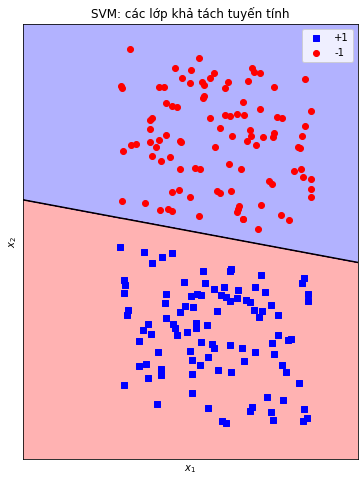

In [11]:
# setting the plot
fig, ax = plt.subplots(figsize=(6,8))
ax.set_title('SVM: các lớp khả tách tuyến tính')
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_xticks(())
ax.set_yticks(())

# plot the original data
ax.contourf(_x,_y,_z,colors=['r','b'], alpha=0.3)
ax.scatter(X_1_data_1, X_1_data_2, label='+1', marker='s', c='b')
ax.scatter(X_2_data_1, X_2_data_2, label='-1', c='r')
# ax.scatter(x_margin_1, y_margin_1, s=150, facecolors='none', edgecolors='b')
# ax.scatter(x_margin_2, y_margin_2, s=150, facecolors='none', edgecolors='r')
# rotation_angle = ax.transData.transform_angles(np.array((angle,)), np.array([x[5], y_0[5]]).reshape((1, 2)))[0]
ax.plot(_x,_y_0,c='black')
# ax.text(x[5],y_0[5]+0.05,r'$\bf w^{T}x$$+b=0$',rotation_mode='anchor', rotation=rotation_angle)
# ax.plot(_x,_y_1,c='b',ls='--')
# ax.text(x[5],y_1[5]+0.05,r'$\bf w^{T}x$$+b=1$',rotation_mode='anchor', rotation=rotation_angle)
# ax.plot(_x,_y_2,c='r',ls='--')
# ax.text(x[5],y_2[5]+0.05,r'$\bf w^{T}x$$+b=-1$',rotation_mode='anchor', rotation=rotation_angle)
ax.legend()
plt.show()